# Fraud Detection – Exploratory Data Analysis
Doel van dit project is het analyseren en onderzoeken van fraude


In [1]:
import os
import pandas as pd

print("Huidige werkmap:", os.getcwd())


Huidige werkmap: c:\Users\Wendy de Borger\Documents\Project Fraud Trends Analyzer\Notebooks


In [2]:
for root, dirs, files in os.walk(".."):
    if "creditcard.csv" in files:
        print("✅ Dataset gevonden op pad:", os.path.join(root, "creditcard.csv"))


✅ Dataset gevonden op pad: ..\Data\creditcard.csv


## Dataset inladen
We gebruiken het juiste pad dat we net gevonden hebben en laden de 10 eerste rijen.


In [3]:
df = pd.read_csv("..\Data\creditcard.csv")
df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Wendy de Borger\AppData\Local\Temp\ipykernel_23668\456408960.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("..\Data\creditcard.csv")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Bepalen hoeveel transacties fraude (class = 1) zijn

In [4]:
transacties_per_fraudekarakter = df["Class"].value_counts()
Aantal_fraude = transacties_per_fraudekarakter[1]
Aantal_Niet_Fraude = transacties_per_fraudekarakter[0]
Percentage_Fraude = Aantal_fraude / (Aantal_fraude + Aantal_Niet_Fraude)
print(f"{round(Percentage_Fraude*100,2)}% van deze dataset zijn fraud cases --> zwaar ongebalanceerd!")

0.17% van deze dataset zijn fraud cases --> zwaar ongebalanceerd!


## Dataset opsplitsen op basis van fraude en simpele statistieken laten lopen

In [5]:
fraud_df = df[df["Class"]==1]
normal_df = df[df["Class"]==0]

print(fraud_df.describe())
print(normal_df.describe())

                Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  ...   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123  ...   
std      5.372468    1.858124    7.206773    6.797831    2.500896  ...   
min    -22.105532   -6.406267  -43.557242  -41.044261  

# Histogram van Amount voor fraude vs. niet-fraude

## Ik importeer Seaborn en Matplotlib om visuals te maken

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

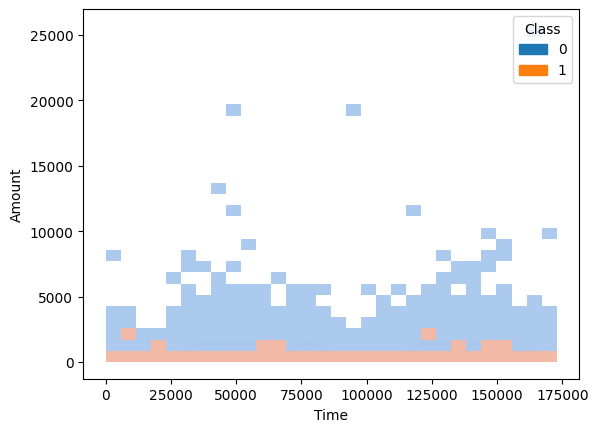

<Figure size 1200x600 with 0 Axes>

In [9]:
g = sns.histplot(x="Time",y="Amount", hue="Class", data=df,bins=30)
plt.figure(figsize=(12,6))
plt.show()


## Maken van een Boxplot
Fraudegebonden transacties hebben een lagere spreiding en lagere maximale bedragen.
Niet-fraude transacties tonen veel grotere variatie en extreme uitschieters, soms tot boven €25.000.
Dit ondersteunt het typische patroon in fraudedetectie: frauduleuze transacties blijven vaak onder een relatief laag bedrag om niet op te vallen.

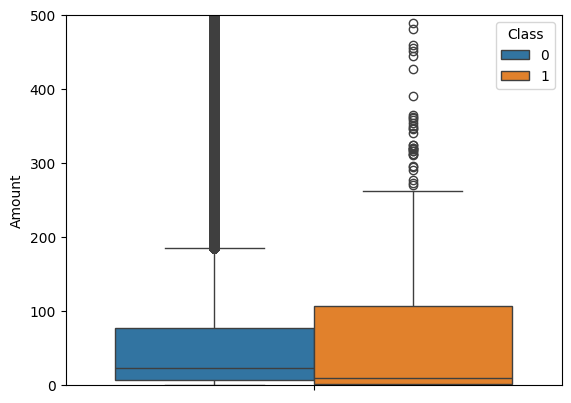

In [26]:
sns.boxplot(y="Amount", hue="Class", data=df,linewidth=1)
plt.ylim(0,500)
plt.show()


# Correlatieanalayse
Er is nergens een (sterke)correlatie te vinden wat te verklaren valt. Fraude is geen lineair patroon.

In [51]:
corr_with_class = df.corr()["Class"].abs().sort_values(ascending=False)
corr_with_class


Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

# Model voorbereiding: train/test split + balancing

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# X = alle kolommen behalve Class (want dat is wat we willen voorspellen)
X = df.drop(columns=["Class"])
y = df["Class"]

# Splits de data in training (80%) en test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (227845, 30)
Test shape: (56962, 30)


In [66]:
scaler = StandardScaler()
scaler.fit(X_train)

print("Scaler is getraind op de training data ✅")

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data is geschaald ✅")

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Model is getraind ✅")


Scaler is getraind op de training data ✅
Data is geschaald ✅
Model is getraind ✅


## Model testen

In [72]:
# import the metrics class
from sklearn import metrics
y_pred = model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

c:\Users\Wendy de Borger\Documents\Project Fraud Trends Analyzer\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[56845,    19],
       [   97,     1]])

## Classification report

In [73]:
from sklearn.metrics import classification_report
target_names = ['No fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No fraud       1.00      1.00      1.00     56864
       Fraud       0.05      0.01      0.02        98

    accuracy                           1.00     56962
   macro avg       0.52      0.50      0.51     56962
weighted avg       1.00      1.00      1.00     56962



# Dataset balanceren met SMOTE

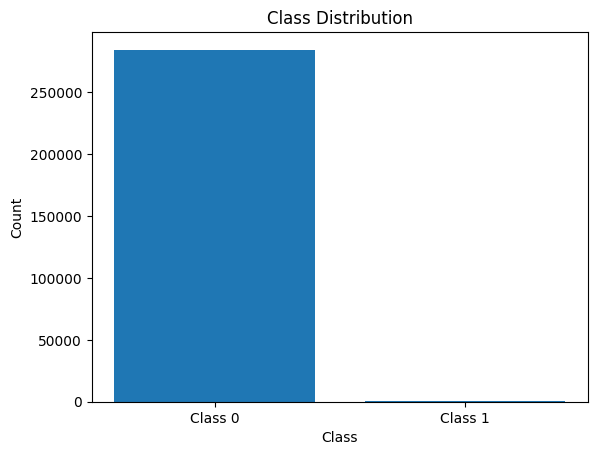

Class
0    284315
1    284315
Name: count, dtype: int64

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
x=df.drop(["Class"],axis=1)
y=df["Class"]

count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution') 
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()



from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(x,y)
y.value_counts()

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.72      0.79        98

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



# Recall verhogen via Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Data laden
df = pd.read_csv("../Data/creditcard.csv")
X = df.drop(columns=["Class"])
y = df["Class"]

print("Originele balans:")
print(y.value_counts())

# 2. Train/test split (heilig)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 3. ---- Model 1: Zonder SMOTE ----
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

print("\nZONDER SMOTE:")
y_pred_base = rf_base.predict(X_test)
print(classification_report(y_test, y_pred_base))

# 4. ---- Model 2: Met SMOTE (alleen op train!) ----
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_sm, y_train_sm)

print("\nMET SMOTE:")
y_pred_sm = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_sm))


Originele balans:
Class
0    284315
1       492
Name: count, dtype: int64

ZONDER SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


MET SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



## Systeem nog scherper maken met weights

In [ ]:
rf_weighted_balanced = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
    n_estimators=10
)
rf_weighted_balanced.fit(X_train,y_train)
rf_weighted_balanced_prediction = rf_weighted_balanced.predict(X_test)

print(classification_report(y_test,rf_weighted_balanced_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56962
   macro avg       0.98      0.85      0.91     56962
weighted avg       1.00      1.00      1.00     56962



### Verschillende weights toepassen

In [101]:
# Weighted 1:5
rf_weighted_1_5 = RandomForestClassifier(
    class_weight={0:1, 1:5},
    random_state=42,
    n_jobs=-1,
    n_estimators=10
)
rf_weighted_1_5.fit(X_train, y_train)
pred_1_5 = rf_weighted_1_5.predict(X_test)
print(classification_report(y_test, pred_1_5))

# Weighted 1:10
rf_weighted_1_10 = RandomForestClassifier(
    class_weight={0:1, 1:10},
    random_state=42,
    n_jobs=-1,
    n_estimators=10
)
rf_weighted_1_10.fit(X_train, y_train)
pred_1_10 = rf_weighted_1_10.predict(X_test)
print(classification_report(y_test, pred_1_10))

# Weighted 1:20

rf_weighted_1_20 = RandomForestClassifier(
    class_weight={0:1, 1:20},
    random_state=42,
    n_jobs=-1,
    n_estimators=10
)
rf_weighted_1_20.fit(X_train, y_train)
pred_1_20 = rf_weighted_1_20.predict(X_test)
print(classification_report(y_test, pred_1_20))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
import joblib
joblib.dump(rf_model, "fraude_random_forest.pkl")


IndexError: list index out of range